# Perceptron desde 0

El perceptron es un clasificador para hacer predicciones binarias (solo dos clases), para clasificar N clases necesitamos N perceptrones.

El perceptron simple solo es aplicable a problemas separables linealmente. Aplicado a otros problemas las tasas de acierto pueden ser bajas.

El perceptron multicapa puede se aplicado a problemas más complicados.


## Como funciona

- El perceptron "aprende" una serie de pesos que se corresponden con los atributos de entrada.
- Cada par de atributo-peso es multiplicado y después los resultados se suman.
- Si la suma supera un determinado umbral se predice una clase, sino, se predice la contraria.
- Por ejemplo si: 
    - altura $\cdot$ $w_1$ + peso $\cdot$ $w_2$ + longitud $\cdot$ $w_3$ > 0, se predice perro y sino se predice gato.
    - Los pesos se aprenden a partir de un conjunto de datos de perros y gatos.


## Como se aprenden los pesos

Es un proceso iterativo, despues de cada iteración (llamadas epocs) se comprueba si la clasificación es correcta, si no lo es, los pesos son actualizados usando un "learning rate". 

# Autores:
- **Rodrigo Díaz García**
- **Miguel Barriuso García**



## El algoritmo de entrenamiento

El algoritmo es bastante sencillo. Estos son los pasos:


1. inicializar el vector de pesos $w$ , el umbral $z$ de la función de activación, el número de iteraciones (epocs) $t$ y el learning rate $\eta$ (coeficiente de aprendizaje).
 - Con frecuencia los pesos $w$ se inicializan a 0s.
 - El umbral se inicializa a 0.
 - El número de iteraciones depende de la dificultad del problema, a más dificil más iteraciones.
 - El learning rate depende de la dificultad del problema, a más dificil más bajo.

2. Para cada iteración $t$:
    - Para cada ejemplo $i$ del conjunto de entrenamiento:
        - Calcular el sumatorio de las entradas por los pesos ($k$ es el número de atributos).
    
        $sum = \sum_{j=0}^k w_{j} \cdot x_{ij}$
    
        - Se hace pasar el valor resultante por la función de activación. 
        $\hat{y_i} =\begin{cases}
        1 & \text{if }f \gt z\\
        0 & \text{otherwise}.
      \end{cases} $
  
      - Se actualizan los pesos. Con la siguiente formula.
      
          Desde $j=0$ hasta $j<$num_atts:
          - $w_j = w_j + \eta \cdot (y_i-\hat{y_i})\cdot x_{ij})$   
          //¿que hace la formula de arriba? 
          
          //Si la predicción es correcta no cambia el peso. 
          
          //Si falla se modifica el peso usando el producto del valordel atributo asociado a ese peso y el learning rate
          
3. Si se ha alcanzado el número de iteraciones fin.   
    

### Ejemplo paso a paso


Un ejemplo paso a paso de como funciona el perceptron es precisamente la función AND que ya vimos anteriormente.
Es un problema sencillo y linealmente separable.
Dadas dos entradas $x_1$ and $x_2$, la salida de la función and es la siguiente:

|$x_1$|$x_2$|$y$|
|:---:|:---:|:---:|
|0|0|0|
|0|1|0|
|1|0|0|
|1|1|1|

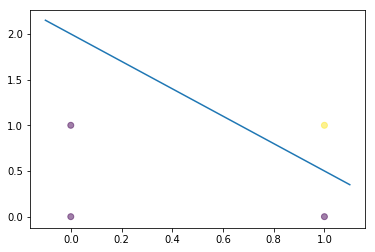

In [1]:
'''
Código en matplotlib, para ver que la función es linealmente separable
'''
% matplotlib inline

# Se ve claramente que la función AND es linealmente separable
# los 1s y 0s de la salida se han pintado de colores diferentes
import numpy as np
import matplotlib.pyplot as plt

x1 = np.array([0,0,1,1])
x2 = np.array([0,1,0,1])
y =  np.array([0,0,0,1])

linex = np.arange(-0.1, 1.1, 0.01)
liney = 2 + (-1.5 * linex)

plt.scatter(x1, x2, c=y, alpha=0.5)
plt.plot(linex,liney)

plt.show()

A parte de las características propias del conjunto de entrenamiento ($x_1$ y $x_2$) se suele introducir una característica adicional o bias ($x_0$ que siempre vale 1) que puede ser util para entrenar el modelo. 

¿Por que es útil el bias?
- En el caso de tener que aproximar una función tal que f(0,0) = 1, no se podría encontrar una combinación de pesos que hiciese que $w_0*0 + w_1*0$ superase un umbral. Por eso se añade una característica adicional que siempre vale 1.


1. Se inicializan los pesos $w_i$ a ceros. 

    - Despues de añadir la $x_0$ tenemos que los pesos iniciales son $w^0_{0}, w^0_{1}, w^0_{2} = (0,0,0)$
    - El umbral de la función de activación se inicializa a cero ($z=0$). 
    - El número de iteraciones se establece en 50 ($t=50$)
    - El coeficiente de aprendizaje o *learning rate* se estable en 0.1 ($\eta=0.1$)
2. En el paso 2 comienza el proceso iterativo. 
    - El sumatorio de las entradas por los pesos: $f = \sum_{j=0}^k w_j x_{0j}$. 
    
    En la iteración 0 (La primera), para los cuatro ejemplos que tenemos sería:
        - $ f = (0\cdot1) + (0\cdot0) + (0\cdot 0) = 0$
        - $ f = (0\cdot1) + (0\cdot0) + (0\cdot 1) = 0$
        - $ f = (0\cdot1) + (0\cdot1) + (0\cdot 0) = 0$
        - $ f = (0\cdot1) + (0\cdot1) + (0\cdot 1) = 0$
    - Se hace pasar el valor resultante por la función de activación 
    $$\hat{y}_i =\begin{cases}
                        1 & \text{if }f \gt z\\
                        0 & \text{otherwise}.
                  \end{cases} $$
    $\hat{y}_i=0$ en los cuatro casos.
    - Se actualizan los pesos. Para los 3 primeros ejemplos no hay diferencia entre $\hat{y}$ e $y$, luego no hay actualización.        
    - Para el cuarto caso (i=3) si que hay que actualizar porque AND(1,1) es 1 y la predicción es 0:
    - Los pesos se van a modificar con el producto de valor del atributo y el learning rate
        - $w^1_0 = w^0_0 + \eta [y_3 -\hat{y}_3]x_{30} $ $ = 0 + 0.1\cdot[1-0]\cdot1 $ $= 0.1$   # Recuerda que $x_0$ valía 1
        - $w^1_1 = w^0_1 + \eta [y_3 -\hat{y}_3]x_{31}$  $ = 0 + 0.1\cdot[1-0]\cdot1 $ $= 0.1$
        - $w^1_2 = w^0_2 + \eta [y_3 -\hat{y}_3]x_{32}$  $ = 0 + 0.1\cdot[1-0]\cdot1 $ $= 0.1$
        
         $w^1_{0}, w^2_{1}, w^1_{2} = (0.1,0.1,0.1)$
- Como no es la iteración 50 seguimos repitiendo el paso 2.

## Implementación Python desde 0

Se va a implementar la función AND en Python. Usando **Numpy** para simplificar las operaciones matemáticas y **Matplotlib** para los gráficos.



In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
"""
Las únicas funciones de numpy que debemos conocer

"""

# crear un array de 0s de un tamaño dado
print(np.zeros(5))

a = np.array([1,2,3])
b = np.array([5,7,8])

# operaciones aritmeticas sobre todo el array a la vez
print(a+b)

# producto vectorial = 1*5 + 2*7 + 3*8 = 43. Esto se puede usar para multiplicar los atributos por los pesos y sumarlos
print(np.dot(a,b))

# equivalente al range pero devolviendo arrays de numpy
print(np.arange(8))

[0. 0. 0. 0. 0.]
[ 6  9 11]
43
[0 1 2 3 4 5 6 7]


In [64]:
# AND Lógico
# nota: x0 es una variable adicional para el bias
#     x0  x1  x2
x = [[1., 0., 0.],                                  
     [1., 0., 1.],                                 
     [1., 1., 0.],                                  
     [1., 1., 1.]] 

# Salida deseada
y = [0.,                                            
     0.,                                            
     0.,                                            
     1.] 

In [79]:
'''
Entrenamiento del perceptron

x: datos de entrada (ampliados con el x_0)
y: salidas
z: umbral
eta: coeficiente de aprendizaje (learning rate)
t: número de iteraciones

internamente obtiene el error del modelo, pero eso lo da el profesor

 entrena_perceptron(x, y, z, eta, t)
'''
def entrena_perceptron(X, y, z, eta, t):    
    # inicialización de los pesos
    
    
    w = np.zeros(len(X[0]))       
    n = 0                           # numero de iteraciones se inicializa a 0                     
    
    # Inicialización de variables adicionales 
    ypred = np.zeros(len(y))     # array para las predicciones de cada ejemplo
    errors = np.zeros(len(y))       # array para los errores (valor real - predicción)
    J = []                          # error total del modelo     
    
    while n < t:  
        ############## a completar (desde aqui) #################
        # para cada ejemplo x del conjunto de datos X
        #        Calcular el sumatorio de las entradas por los pesos (np.dot) 
        #        Se hace pasar el valor resultante por la función de activación 
        #        Para cada peso
        #              actualizar peso
        #######################################################
        for i in range(len(X)):
            ypred[i] = 1 if np.dot(X[i], w) > z else 0
            for j in range(len(w)):
                w[j] += eta * (y[i] - ypred[i]) * X[i][j]
        
          
        ############## a completar (hasta aqui) #################
        
        n += 1 # se incrementa el número de iteraciones 

        
        
        # calculo del error cuadrático del modelo
        # esto no es más que la suma de cuadrados entre el valor real y la predicción
        for i in range(0,len(y)):     
            errors[i] = (y[i]-ypred[i])**2
        J.append(0.5*np.sum(errors))
           
    # Devuelve los pesos y el error cuadrático
    return w, J


z = 0.0     # umbral
eta = 0.1   # learning rate
t = 50      # número de iteraciones

weights, errors = entrena_perceptron(x, y, z, eta, t)

print("Los pesos son:")
print(weights)

print("La suma de errores cuadráticos es:")
print(errors)


Los pesos son:
[-0.2  0.2  0.1]
La suma de errores cuadráticos es:
[0.5, 1.5, 1.5, 1.0, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


Text(0.5,1,'Convergencia')

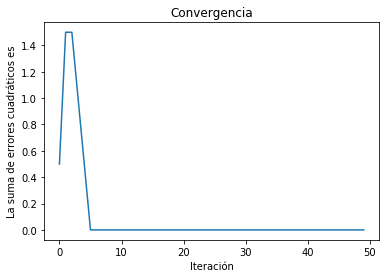

In [77]:
"""
Graficando como desciende el error a medida que pasan las iteraciones (converge)
"""

epoch = np.arange(t)

plt.plot(epoch, errors)
plt.xlabel('Iteración')
plt.ylabel('La suma de errores cuadráticos es')
plt.title('Convergencia')
    

Se puede ver como a partir de la cuarta iteración el perceptrón converge.

## Comentarios adicionales y mejoras que se podrian hacer a la versión básica

- El método es dependiente de los parámetros. Learning rate, número de iteraciones y umbral.
    - Con un learning rate más alto puede converger más rápido, pero puede no converger si el problema es dificilmente separable.
    - Una buena estrategía es empezar con un learning rate alto e ir descendiendo (como la idea del recocido simulado).
    - Para el resto de parámetros es prueba-error.
- Se puede detener el método una vez ha convergido, sin esperar al final de las iteraciones.
- En ocasiones puede funcionar mejor inicializar los pesos aleatoriamente en lugar de a 0s.


### Perceptron de Scikit-learn 

Vamos a comparar los pesos obtenidos por el algoritmo básico y los obtenidos por la implementación de  Scikit-learn (la librería de aprendizaje automático estandard de python).

In [78]:
from sklearn.linear_model import Perceptron

# Se crea el Perceptron, ajustando sus parámetros para que funcione como nuestra implementación
'''

fit_intercept : bool
If False, the data is assumed to be already centered. Defaults to True.
El perceptron tiene que trabajar con datos centrados (media 0, sino puede funcionar mal.)

shuffle : bool, optional, default True
Whether or not the training data should be shuffled after each epoch.
Para evitar la influencia del orden de las instancias, se barajean cada vez
'''


clf = Perceptron(random_state=None, eta0= 0.1, shuffle=False, fit_intercept=False)

# 
clf.fit(x, y)

print("Pesos sklearn:")
print(clf.coef_[0])

print("Pesos perceptron propio:")
print(weights)

Pesos sklearn:
[-0.2  0.2  0.1]
Pesos perceptron propio:
[-0.2  0.2  0.1]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Para ejemplos sencillos el algoritmo básico va a funcionar igual que la implementación de sklearn. Sin embargo la implementación de sklearn tiene algunas optimizaciones que hace que funcione distinto en otros casos.

